<a href="https://colab.research.google.com/github/kamilasouzac/Amazon_Top_50_Bestselling_Books_2009_2022./blob/main/Amazon_Top_50_Bestselling_Books_2009_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neste projeto, vamos realizar a análise exploratória da lista dos 50 livros mais vendidos por ano na Amazon, entre 2009 e 2022.

O dataset é de domínio público e disponível em: https://www.kaggle.com/datasets/chriskachmar/amazon-top-50-bestselling-books-2009-2022

#**Preparando o ambiente**

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Definindo parâmetros do Seaborn 

In [2]:
sns.set_theme(style = 'ticks', 
        font_scale = 1.3,
        palette = 'Set2')

#**Importando dataset**

In [3]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Amazon_Top_50_Bestselling_Books_2009_2022.csv')

In [4]:
dados.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction


#Conhecendo e limpando o dataset

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         700 non-null    object 
 1   Author       700 non-null    object 
 2   User Rating  700 non-null    float64
 3   Reviews      700 non-null    int64  
 4   Price        700 non-null    int64  
 5   Year         700 non-null    int64  
 6   Genre        700 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 38.4+ KB


Não existem dados nulos/faltantes no dataset, podemos inciar as análises.



---



---



Observação: 


Em primeira análise, não encontramos inconsistências no dataset, mas ao realizar análises futuras, encontramos objetos com divergência no nome, e que alteravam os resultados. Ajustamos esses casos para que ficassem com a mesma grafia.

In [6]:
dados['Author'] = dados['Author'].replace({'J. K. Rowling':'J.K. Rowling'})


In [7]:
dados['Name'] = dados['Name'].replace({'The 5 Love Languages: The Secret to Love that Lasts':'The 5 Love Languages: The Secret to Love That Lasts'})

In [8]:
dados.rename(columns = {'User Rating':'User_Rating'}, inplace = True)

#Análise exploratória

Iremos, primeiramente, explorar cada variável individualmente (análise univariada), conhecer suas propriedades e extrair *insights*. 

Em seguida, iremos explorar o relacionamento entre as variáveis (análise multivariada).


## Análise Univariada

## Autores

In [9]:
# Primeiro, queremos saber quantos autores únicos existem no nosso dataset:

dados['Author'].value_counts().describe()

#Existem 304 autores exclusivos no dataset.
# Sabemos também que o autor que mais publicou, tem 14 livros.

count    304.000000
mean       2.302632
std        2.189201
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       14.000000
Name: Author, dtype: float64

In [10]:
dados['Author'].value_counts().mode()

# A moda é apenas 1 (número de aparições na lista dos top 50 com maior frequência)

0    1
dtype: int64

In [11]:
# Agora, queremos saber quais são os autores que entraram para a lista do Top 50 mais de uma vez, e suas frequencias.
#Para isso, criaremos um df com a contagem de cada autor.

contagem_autores = dados['Author'].value_counts().to_frame()
contagem_autores.rename_axis('Autor', axis = 'columns', inplace = True)
contagem_autores.rename(columns = {'Author': 'Quantas_vezes_entrou_no_Top_50'}, inplace = True)
contagem_autores

Autor,Quantas_vezes_entrou_no_Top_50
Gary Chapman,14
Jeff Kinney,14
Suzanne Collins,12
Rick Riordan,11
American Psychological Association,11
...,...
Randall Munroe,1
Coloring Books for Adults,1
Chris Kyle,1
Angie Grace,1


In [12]:
#Agora, podemos usar o método query para selecionarmos os autores com múltiplas aparições

autores_recorrentes = contagem_autores.query("Quantas_vezes_entrou_no_Top_50 > 1")
autores_recorrentes

Autor,Quantas_vezes_entrou_no_Top_50
Gary Chapman,14
Jeff Kinney,14
Suzanne Collins,12
Rick Riordan,11
American Psychological Association,11
...,...
Samin Nosrat,2
Robert Greene,2
George R. R. Martin,2
Robert T. Kiyosaki,2


In [13]:
autores_recorrentes.describe()

#Temos 149 autores com múltiplas aparições no Top 50.
#O maior número de aparições por autor foi 14, o menor 2.
# 75% desses autores esteve na lista até 4 vezes, indicando forte assimetria entre os autores com mais aparições

Autor,Quantas_vezes_entrou_no_Top_50
count,149.000000
mean,3.657718
std,2.487188
min,2.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,14.000000


In [14]:
autores_recorrentes['Quantas_vezes_entrou_no_Top_50'].mode()

# Apesar de termos selecionado apenas autores que apareceram mais de uma vez, a moda continua baixa (2), 
# confirmando a forte assimetria entre o número de aparições nos top 50 

0    2
dtype: int64

Text(0.5, 0, 'Nº de aparições na lista')

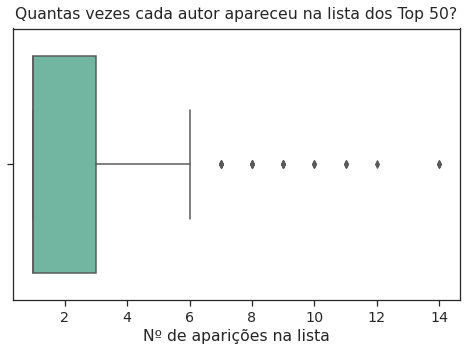

In [15]:
# O boxplot confirma visualmente a assimetria (à direita) dos dados,
# bem como explicita a existência de outliers

fig = plt.figure(figsize = [8,5])

boxplot = sns.boxplot(data = dados, x = dados['Author'].value_counts(), orient = 'h', whis =1.5)
boxplot.set_title('Quantas vezes cada autor apareceu na lista dos Top 50?', pad = 10)
boxplot.set_xlabel('Nº de aparições na lista')

In [16]:
# Podemos visualisar quais são os autores que aparecem como outliers

outliers = contagem_autores.query("Quantas_vezes_entrou_no_Top_50 > 6")
outliers

Autor,Quantas_vezes_entrou_no_Top_50
Gary Chapman,14
Jeff Kinney,14
Suzanne Collins,12
Rick Riordan,11
American Psychological Association,11
Eric Carle,10
Dr. Seuss,10
Gallup,9
Don Miguel Ruiz,9
Dav Pilkey,9


In [17]:
# Temos 16 outliers no nosso dataset

outliers.count()

Autor
Quantas_vezes_entrou_no_Top_50    16
dtype: int64

###Conclusão

> Temos 304 autores com livros que atingiram a marca dos top 50 livros mais vendidos do ano.

> Podemos perceber forte assimetria entre os autores em relação ao número de aparições na lista.

> Enquanto a maior parte (moda), é chegar ao topo do 50 mais vendidos apenas uma vez, temos autores que aparecem até 14 vezes na lista. 

> 75% dos autores apareceram até 3 vezes na lista dos 50+

> 16 autores se destacam como outliers (mais de 6 aparições na lista)

> Como nosso dataset cobre um período de 13 anos, autores com mais de 13 publicações devem ter mais de um livro à atingir essa marca.

##Livros

In [18]:
dados['Name'].value_counts().describe()

#temos 440 títulos únicos no dataset
#assim como na contagem dos autores, temos forte assimetria entre os títulos
#50% dos livros chegaram ao top 50 apenas uma vez ao longo dos anos
#25% chegaram ao top 50 duas vez ao longo dos anos
#temos pelo menos um livro que apareceu na lista dos 50+ todos os anos

count    440.000000
mean       1.590909
std        1.409667
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       13.000000
Name: Name, dtype: float64

Text(0.5, 0, 'Contagem de aparições')

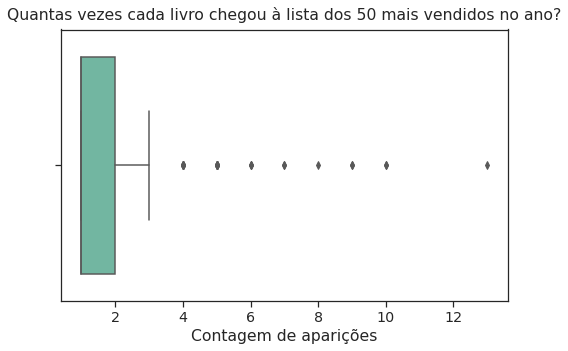

In [19]:
fig = plt.figure(figsize = [8,5])

ax = sns.boxplot(data = dados, x = dados['Name'].value_counts(), orient = 'h', whis = 1.5)
ax.set_title('Quantas vezes cada livro chegou à lista dos 50 mais vendidos no ano?', pad = 10)
ax.set_xlabel('Contagem de aparições')

In [20]:
#quais são os títulos, e quantas vezes chegaram à lista?

contagem_livros = dados['Name'].value_counts().to_frame()
contagem_livros.rename_axis('Livro', axis = 'columns', inplace = True)
contagem_livros.rename(columns = {'Name':'Contagem'}, inplace = True)
contagem_livros

Livro,Contagem
The 5 Love Languages: The Secret to Love That Lasts,13
The Very Hungry Caterpillar,10
"Publication Manual of the American Psychological Association, 6th Edition",10
StrengthsFinder 2.0,9
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book),9
...,...
"Soul Healing Miracles: Ancient and New Sacred Wisdom, Knowledge, and Practical Techniques for Healing the Spiritual…",1
Shred: The Revolutionary Diet: 6 Weeks 4 Inches 2 Sizes,1
Rush Revere and the Brave Pilgrims: Time-Travel Adventures with Exceptional Americans (1),1
"Lean In: Women, Work, and the Will to Lead",1


In [21]:
contagem_livros.query('Contagem > 1')

# dos 440 títulos do dataset, apenas 121 aparecem mais de uma vez na lista

Livro,Contagem
The 5 Love Languages: The Secret to Love That Lasts,13
The Very Hungry Caterpillar,10
"Publication Manual of the American Psychological Association, 6th Edition",10
StrengthsFinder 2.0,9
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book),9
...,...
The Girl with the Dragon Tattoo (Millennium Series),2
Radical: Taking Back Your Faith from the American Dream,2
The Girl on the Train,2
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics,2


In [22]:
contagem_livros.query('Contagem > 1').describe()

# dos livros que se repetem ao longo dos anos, 50% aparecem até duas vezes

Livro,Contagem
count,121.000000
mean,3.148760
std,1.973411
min,2.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,13.000000


In [23]:
#selecionando outliers

contagem_livros.query('Contagem > 3')

Livro,Contagem
The 5 Love Languages: The Secret to Love That Lasts,13
The Very Hungry Caterpillar,10
"Publication Manual of the American Psychological Association, 6th Edition",10
StrengthsFinder 2.0,9
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book),9
"Oh, the Places You'll Go!",8
How to Win Friends & Influence People,7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change,7
Jesus Calling: Enjoying Peace in His Presence (with Scripture References),6
Giraffes Can't Dance,6


In [24]:
contagem_livros.query('Contagem > 3').count()

#temos 29 outliers no df

Livro
Contagem    29
dtype: int64

###Conclusão

> Temos 440 títulos únicos no dataset.

> Assim como na contagem dos autores, temos forte assimetria entre os títulos.

> Dos 440 títulos do dataset, apenas 121 aparecem mais de uma vez na lista.

> 50% dos livros chegaram ao top 50 apenas uma vez ao longo dos anos.

> 25% chegaram ao top 50 duas vez ao longo dos anos.

> Temos pelo menos um livro que apareceu na lista dos 50+ todos os anos.

>  Temos 29 títulos que se enquadram como outliers (livros que entraram para a lista mais de três anos).

##Categoria

In [25]:
frequencia = dados['Genre'].value_counts(normalize = True).round(2)
contagem = dados['Genre'].value_counts()

pd.DataFrame({'Frequência %':frequencia, 'Contagem':contagem})

#55% dos livros são de Não ficção

,Frequência %,Contagem
Non Fiction,0.55,388
Fiction,0.45,312


Text(0.5, 0, 'Categoria')

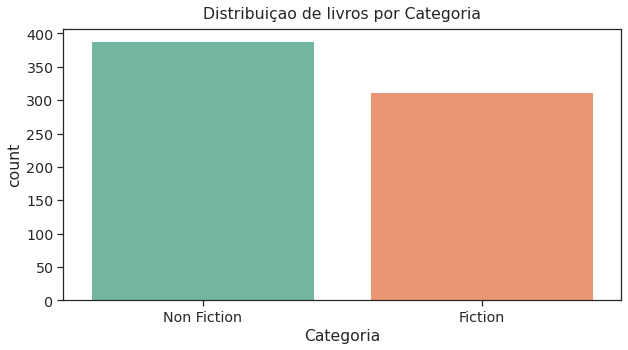

In [26]:
plt.figure(figsize=(10,5))

ax = sns.countplot(data = dados, x = 'Genre')
ax.set_title('Distribuiçao de livros por Categoria', pad = 10)
ax.set_xlabel('Categoria')

###Conclusão

> Maio parte dos livros (55%) que entrarm na lista são de não ficção.

## Notas (User Rating)

In [27]:
notas_recebidas = dados['User_Rating'].unique()
notas_recebidas.sort()
notas_recebidas

# Segundo dicionário disponibilizado pelo  autor dos dados, a nota máxima é 5
# Nota mais alta na nossa amostra é 4.9, bem próxima da nota máxima 
# A nota mais baixa foi 3.3

array([3.3, 3.6, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

In [28]:
dados['User_Rating'].describe().round(2)

# A média da nossa amostra é alta (4.64), o que era de se esperar, já que a lista é
# composta apenas pelos livros mais vendidos no site (espera-se que os mais vendidos
# tenham alta aceitação dos leitores)

# Desvio padrão é baixo, indicando forte concentração das notas ao redor da média

# Média está próxima da mediana, e os quartis tem pouco variação em relação à nota

count    700.00
mean       4.64
std        0.22
min        3.30
25%        4.50
50%        4.70
75%        4.80
max        4.90
Name: User_Rating, dtype: float64

Text(0.5, 0, 'Notas')

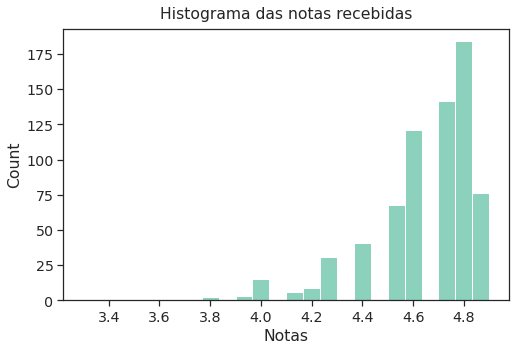

In [29]:
plt.figure(figsize = [8,5])

ax = sns.histplot(data = dados, x = 'User_Rating')
ax.set_title('Histograma das notas recebidas', pad = 10)
ax.set_xlabel('Notas')

# Apesar dos quartis terem localização próxima na escala, pelo histograma podemos perceber que 
# que nossa amostra não tem distribuição normal

Text(0.5, 0, 'Notas Recebidas')

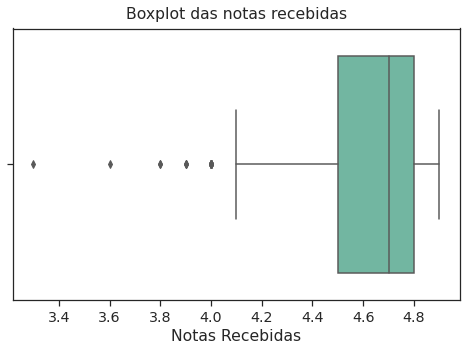

In [30]:
plt.figure(figsize = [8,5])

ax = sns.boxplot(data = dados, x = 'User_Rating', whis = 1.5)
ax.set_title('Boxplot das notas recebidas', pad = 10)
ax.set_xlabel('Notas Recebidas')

In [31]:
IIQ = (4.8 - 4.5)
outliers_esqerda = 4.5 - (IIQ * 1.5)
outliers_esqerda

4.050000000000001

In [32]:
outliers = dados.query("User_Rating < 4.05")
outliers.sort_values(by = ['User_Rating'])

# livros com classificação abaixo de 4.05

,Name,Author,User_Rating,Reviews,Price,Year,Genre
178,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction
316,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction
155,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
208,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2013,Fiction
288,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2014,Fiction
200,Allegiant,Veronica Roth,3.9,6310,13,2013,Fiction
239,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2013,Fiction
24,StrengthsFinder 2.0,Gallup,4.0,5069,17,2009,Non Fiction
380,StrengthsFinder 2.0,Gallup,4.0,5069,17,2016,Non Fiction
366,"Harry Potter and the Cursed Child, Parts 1 & 2...",J.K. Rowling,4.0,23973,12,2016,Fiction


### Conclusão

> Segundo dicionário disponibilizado pelo  autor dos dados, a nota máxima é 5.

> Nota mais alta na nossa amostra é 4.9, bem próxima da nota máxima possível.

> A nota mais baixa foi 3.3. 

> Notas abixo de 4.05 são considerados outliers na amostra.

> A média da nossa amostra é alta (4.64), o que era de se esperar, já que a lista é composta apenas pelos livros mais vendidos no site (espera-se que os mais vendidos tenham alta aceitação dos leitores).

> Desvio padrão é baixo, indicando forte concentração das notas ao redor da média.

> Média está próxima da mediana, e os quartis tem pouco variação em relação à nota.

## Preço

In [33]:
faixa_preco = dados['Price'].unique()
faixa_preco.sort()
faixa_preco

# O preço dos livros vai de 0 a 105 dólares.

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        27,  28,  30,  32,  36,  39,  40,  42,  46,  52,  53,  54,  82,
       105])

In [34]:
dados['Price'].describe()

# Chama a atenção o extremo dos preços: mínimo 0 e máximo 105
# A média é baixa, considerando a faixa de preço, que contém valores mais altos
# Os quartis evidenciam que a concentração dos preços está nas faixas mais baixas (até 15 dólares)

count    700.000000
mean      12.700000
std        9.915162
min        0.000000
25%        7.000000
50%       11.000000
75%       15.000000
max      105.000000
Name: Price, dtype: float64

Text(0.5, 0, 'Preço')

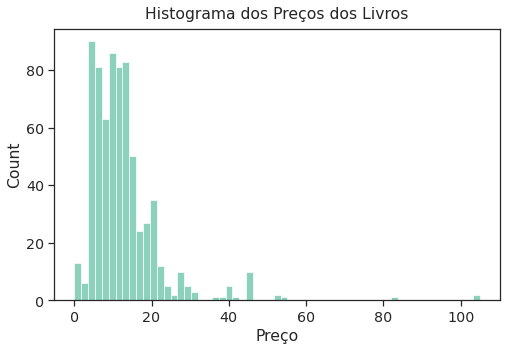

In [35]:
plt.figure(figsize = [8,5])

ax = sns.histplot(dados['Price'])
ax.set_title('Histograma dos Preços dos Livros', pad = 10)
ax.set_xlabel('Preço')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Preços')

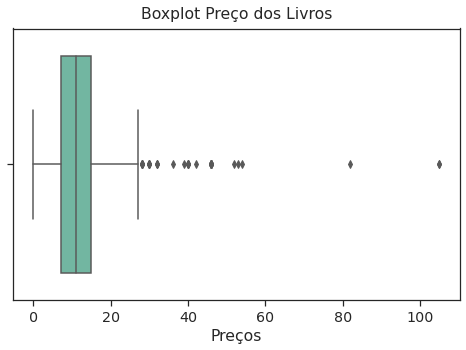

In [36]:
plt.figure(figsize = [8,5])

ax = sns.boxplot(dados['Price'], whis = 1.5)
ax.set_title('Boxplot Preço dos Livros', pad = 10)
ax.set_xlabel('Preços')

In [37]:
IIQ = 15 - 7
outliers = (IIQ * 1.5) + 15
outliers

# Preços acima de 27 dólares são considerados outliers

27.0

In [38]:
dados.query('Price == 0')

# 12 livros no nosso df tem preços zerados. Não temos informações suficientes para definir se
# os livros foram disponibilizados gratuitamente ou se o valor foi um erro de imput 

,Name,Author,User_Rating,Reviews,Price,Year,Genre
94,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
103,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
205,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
247,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
258,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
265,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
269,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
294,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction
347,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
383,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction


In [39]:
dados.query('Price == 105')

# O livro mais caro disponibilizado é um livro técnico

,Name,Author,User_Rating,Reviews,Price,Year,Genre
204,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
253,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction


In [40]:
dados.query('Price > 27')

# Livros cujos preços são considerados outliers

,Name,Author,User_Rating,Reviews,Price,Year,Genre
22,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction
28,The Book of Basketball: The NBA According to T...,Bill Simmons,4.7,858,53,2009,Non Fiction
43,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction
48,Watchmen,Alan Moore,4.8,3829,42,2009,Fiction
70,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2010,Non Fiction
77,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2010,Non Fiction
91,The Official SAT Study Guide,The College Board,4.4,1201,40,2010,Non Fiction
102,A Stolen Life: A Memoir,Jaycee Dugard,4.6,4149,32,2011,Non Fiction
120,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2011,Non Fiction
127,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2011,Non Fiction


### Conclusão

> Chama a atenção o extremo dos preços: mínimo 0 e máximo 105.

> A média é baixa, considerando a faixa de preço, que contém valores mais altos.

> Os quartis evidenciam que a concentração dos preços está nas faixas mais baixas (até 15 dólares).

> Preços acima de 27 dólares são considerados outliers.

> 12 livros no nosso df tem preços zerados. Não temos informações suficientes para definir se os livros foram disponibilizados gratuitamente ou se o valor foi um erro de imput.

## Reviews - Número de avaliações

In [41]:
dados['Reviews'].describe()

count       700.000000
mean      19255.195714
std       23613.443875
min          37.000000
25%        4987.250000
50%       10284.000000
75%       23358.000000
max      208917.000000
Name: Reviews, dtype: float64

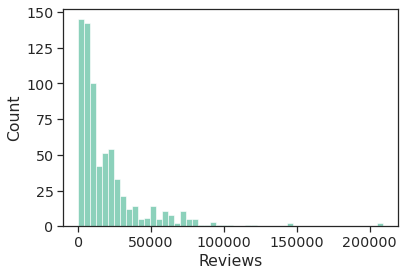

In [42]:
sns.histplot(data = dados, x = 'Reviews')

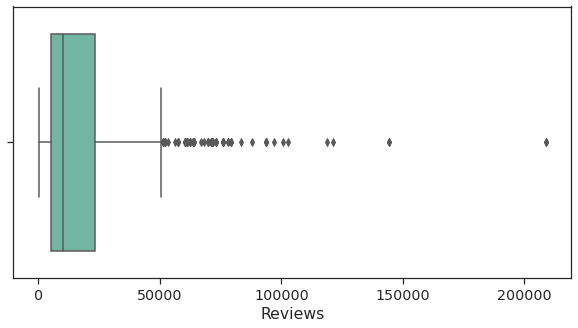

In [43]:
plt.figure(figsize = [10,5])

sns.boxplot(data = dados, x = 'Reviews')

In [44]:
dados.query('Reviews == 208917.000000')

,Name,Author,User_Rating,Reviews,Price,Year,Genre
699,Where the Crawdads Sing,Delia Owens,4.8,208917,10,2022,Fiction


#Análise Multivariada

## Quanti X Quanti

In [45]:
dados.corr()

# A única correlação mais forte é entre Reviews e User Rating - característica geral de uma amostra 
#(quanto maior uma amostra, melhor distribuída são as notas)

,User_Rating,Reviews,Price,Year
User_Rating,1.000000,0.080423,-0.157253,0.286601
Reviews,0.080423,1.000000,-0.114554,0.494279
Price,-0.157253,-0.114554,1.000000,-0.155266
Year,0.286601,0.494279,-0.155266,1.000000


###Conclusão

>  A única correlação mais forte é entre Reviews e User Rating - característica geral de uma amostra (quanto maior uma amostra, melhor distribuída são as notas).

##Quali X Quali

###Livros X Autores

In [46]:
Gary = dados.query('Author == "Gary Chapman"')
Gary.Name.unique()

# Gary Chapman é o autor que mais aparece na lista, com dois títulos alcançando a marca dos 50+ vendidos

array(['The Five Love Languages: How to Express Heartfelt Commitment to Your Mate',
       'The 5 Love Languages: The Secret to Love That Lasts'],
      dtype=object)

In [47]:
Gary

,Name,Author,User_Rating,Reviews,Price,Year,Genre
31,The Five Love Languages: How to Express Heartf...,Gary Chapman,4.6,803,9,2009,Non Fiction
77,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2010,Non Fiction
127,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2011,Non Fiction
174,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2012,Non Fiction
232,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2013,Non Fiction
279,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2014,Non Fiction
332,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.8,25554,8,2015,Non Fiction
381,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.8,25554,8,2016,Non Fiction
429,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.8,25554,8,2017,Non Fiction
484,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.8,25554,8,2018,Non Fiction


In [48]:
Jeff = dados.query('Author == "Jeff Kinney"')
Jeff

,Name,Author,User_Rating,Reviews,Price,Year,Genre
5,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
7,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
95,"The Ugly Truth (Diary of a Wimpy Kid, Book 5)",Jeff Kinney,4.8,3796,12,2010,Fiction
103,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
193,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",Jeff Kinney,4.7,6377,7,2012,Fiction
205,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
254,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney,4.8,6540,22,2014,Fiction
328,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction
359,Double Down (Diary of a Wimpy Kid #11),Jeff Kinney,4.8,5118,20,2016,Fiction
432,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction


In [49]:
Jeff.Name.unique()

array(['Diary of a Wimpy Kid: The Last Straw (Book 3)',
       'Dog Days (Diary of a Wimpy Kid, Book 4) (Volume 4)',
       'The Ugly Truth (Diary of a Wimpy Kid, Book 5)',
       'Cabin Fever (Diary of a Wimpy Kid, Book 6)',
       'The Third Wheel (Diary of a Wimpy Kid, Book 7)',
       'Diary of a Wimpy Kid: Hard Luck, Book 8',
       'Diary of a Wimpy Kid: The Long Haul',
       'Old School (Diary of a Wimpy Kid #10)',
       'Double Down (Diary of a Wimpy Kid #11)', 'The Getaway',
       'The Meltdown (Diary of a Wimpy Kid Book 13)',
       'Wrecking Ball (Diary of a Wimpy Kid Book 14)',
       'The Deep End (Diary of a Wimpy Kid Book 15)',
       'Big Shot Diary of a Wimpy Kid Book 16'], dtype=object)

In [50]:
Jeff.Name.describe()

# Jeff Kinney é o segundo autor com mais ocorrencias, e tem 14 livros que alcançaram 
# a lista dos mais vendidos

count                                                14
unique                                               14
top       Diary of a Wimpy Kid: The Last Straw (Book 3)
freq                                                  1
Name: Name, dtype: object

In [51]:
Suzanne = dados.query('Author == "Suzanne Collins"')
Suzanne

,Name,Author,User_Rating,Reviews,Price,Year,Genre
54,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2010,Fiction
67,Mockingjay (The Hunger Games),Suzanne Collins,4.5,26741,8,2010,Fiction
87,The Hunger Games,Suzanne Collins,4.7,32122,14,2010,Fiction
104,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2011,Fiction
118,Mockingjay (The Hunger Games),Suzanne Collins,4.5,26741,8,2011,Fiction
136,The Hunger Games (Book 1),Suzanne Collins,4.7,32122,8,2011,Fiction
137,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30,2011,Fiction
151,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2012,Fiction
165,Mockingjay (The Hunger Games),Suzanne Collins,4.5,26741,8,2012,Fiction
183,The Hunger Games (Book 1),Suzanne Collins,4.7,32122,8,2012,Fiction


In [52]:
Suzanne.Name.unique()

array(['Catching Fire (The Hunger Games)',
       'Mockingjay (The Hunger Games)', 'The Hunger Games',
       'The Hunger Games (Book 1)',
       'The Hunger Games Trilogy Boxed Set (1)',
       'The Ballad of Songbirds and Snakes (A Hunger Games Novel)'],
      dtype=object)

In [53]:
Suzanne.Name.describe()

# Suzanne Collins é a terciera autora com mais ocorrencias, e tem 6 livros que alcançaram 
# a lista dos mais vendidos

count                                   12
unique                                   6
top       Catching Fire (The Hunger Games)
freq                                     3
Name: Name, dtype: object

In [54]:
Rick = dados.query('Author == "Rick Riordan"')
Rick

,Name,Author,User_Rating,Reviews,Price,Year,Genre
37,The Last Olympian (Percy Jackson and the Olymp...,Rick Riordan,4.8,4628,7,2009,Fiction
69,Percy Jackson and the Olympians Paperback Boxe...,Rick Riordan,4.8,548,2,2010,Fiction
89,The Last Olympian (Percy Jackson and the Olymp...,Rick Riordan,4.8,4628,7,2010,Fiction
90,"The Lost Hero (Heroes of Olympus, Book 1)",Rick Riordan,4.8,4506,14,2010,Fiction
92,"The Red Pyramid (The Kane Chronicles, Book 1)",Rick Riordan,4.6,2186,12,2010,Fiction
143,"The Son of Neptune (Heroes of Olympus, Book 2)",Rick Riordan,4.8,4290,10,2011,Fiction
144,"The Throne of Fire (The Kane Chronicles, Book 2)",Rick Riordan,4.7,1463,10,2011,Fiction
187,"The Mark of Athena (Heroes of Olympus, Book 3)",Rick Riordan,4.8,6247,10,2012,Fiction
192,"The Serpent's Shadow (The Kane Chronicles, Boo...",Rick Riordan,4.8,2091,12,2012,Fiction
241,"The House of Hades (Heroes of Olympus, Book 4)",Rick Riordan,4.8,6982,14,2013,Fiction


In [55]:
Rick.Name.unique()

array(['The Last Olympian (Percy Jackson and the Olympians, Book 5)',
       'Percy Jackson and the Olympians Paperback Boxed Set (Books 1-3)',
       'The Lost Hero (Heroes of Olympus, Book 1)',
       'The Red Pyramid (The Kane Chronicles, Book 1)',
       'The Son of Neptune (Heroes of Olympus, Book 2)',
       'The Throne of Fire (The Kane Chronicles, Book 2)',
       'The Mark of Athena (Heroes of Olympus, Book 3)',
       "The Serpent's Shadow (The Kane Chronicles, Book 3)",
       'The House of Hades (Heroes of Olympus, Book 4)',
       'The Blood of Olympus (The Heroes of Olympus (5))'], dtype=object)

In [56]:
Rick.Name.describe()

count                                                    11
unique                                                   10
top       The Last Olympian (Percy Jackson and the Olymp...
freq                                                      2
Name: Name, dtype: object

In [57]:
APAS = dados.query('Author == "American Psychological Association"')
APAS

,Name,Author,User_Rating,Reviews,Price,Year,Genre
22,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction
70,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2010,Non Fiction
120,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2011,Non Fiction
170,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2012,Non Fiction
225,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2013,Non Fiction
276,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2014,Non Fiction
329,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction
379,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2016,Non Fiction
425,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2017,Non Fiction
479,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2018,Non Fiction


In [58]:
APAS.Name.unique()

array(['Publication Manual of the American Psychological Association, 6th Edition',
       'Publication Manual of the American Psychological Association: 7th Edition, Official, 2020 Copyright'],
      dtype=object)

### Categoria X Autor

In [59]:
fiction_count = dados.query('Genre == "Fiction"')['Author'].value_counts()
fiction_count

Jeff Kinney          14
Suzanne Collins      12
Rick Riordan         11
Dr. Seuss            10
Eric Carle           10
                     ..
Golden Books          1
Margaret Atwood       1
Jay Asher             1
Madeleine L'Engle     1
Nita Prose            1
Name: Author, Length: 112, dtype: int64

In [60]:
non_fiction_count = dados.query('Genre == "Non Fiction"')['Author'].value_counts()
non_fiction_count

Gary Chapman                          14
American Psychological Association    11
Don Miguel Ruiz                        9
Gallup                                 9
Rob Elliott                            8
                                      ..
Phil Robertson                         1
Brian Kilmeade                         1
Brené Brown                           1
Cheryl Strayed                         1
Stephen Perrine                        1
Name: Author, Length: 194, dtype: int64

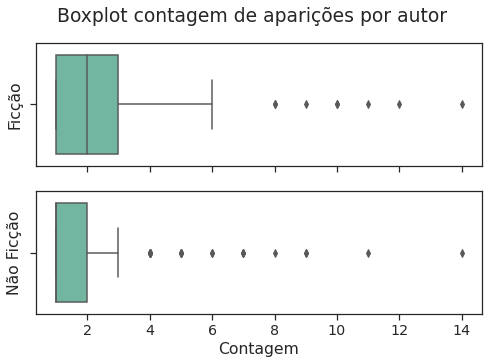

In [61]:
fig, (ax1, ax2) = plt.subplots(2, figsize = [8,5], sharex = True)

sns.boxplot(ax = ax1, x = fiction_count, orient = 'h')
sns.boxplot(ax = ax2, x = non_fiction_count, orient = 'h')

fig.suptitle('Boxplot contagem de aparições por autor')

ax1.set_ylabel('Ficção')
ax2.set_ylabel('Não Ficção')

ax2.set_xlabel('Contagem')

ax1.label_outer()

### Categoria X Ano

In [62]:
categoria_por_ano = dados.groupby('Year')['Genre'].value_counts().to_frame()
categoria_por_ano.rename(columns = {'Genre':'Contagem'}, inplace = True)
categoria_por_ano

Contagem
Year Genre                
2009 Non Fiction        26
     Fiction            24
2010 Non Fiction        30
     Fiction            20
2011 Non Fiction        29
     Fiction            21
2012 Non Fiction        29
     Fiction            21
2013 Non Fiction        26
     Fiction            24
2014 Fiction            29
     Non Fiction        21
2015 Non Fiction        33
     Fiction            17
2016 Non Fiction        31
     Fiction            19
2017 Non Fiction        26
     Fiction            24
2018 Non Fiction        29
     Fiction            21
2019 Non Fiction        30
     Fiction            20
2020 Non Fiction        29
     Fiction            21
2021 Fiction            25
     Non Fiction        25
2022 Fiction            26
     Non Fiction        24

Text(0, 0.5, 'Quantidade')

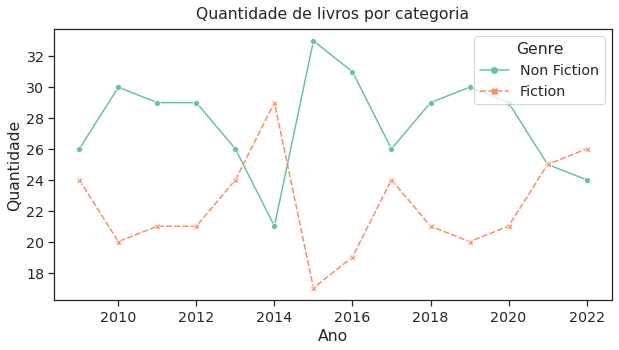

In [84]:
plt.figure(figsize=(10,5))

ax = sns.lineplot(data = categoria_por_ano, x = 'Year', y = 'Contagem', hue = 'Genre', style = 'Genre', markers = True)
ax.set_title('Quantidade de livros por categoria', pad = 10)
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade')

### Conclusão

> Dos 5 autores com mais aparições na lista dos mais vendidos, temos dois autores de não-ficção e três de ficção. Os autores de ficção entraram na lista por séries de livros, sendo que cada livro entrou na máximo três vezes na lista.

> Já entre os autores de ficção, temos uma pessoa física e uma jurídica. Em ambos os casos, apenas um título os levou recorrentemente ao topo das vendas.

> É mais comum autores de ficção aparecerem mais de uma vez na lista do que autores de não ficção.

## Quali vs Quanti

###Preço X Categoria

In [64]:
dados.groupby('Genre')['Price'].describe()

# A categoria ficção tem menor média, desvio padrão e valor máximo do que a categoria de não ficção.

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Fiction,312.0,10.663462,7.888219,0.0,6.0,9.0,13.0,82.0
Non Fiction,388.0,14.337629,11.024142,0.0,8.0,12.0,17.0,105.0


Text(0.5, 0, 'Preço')

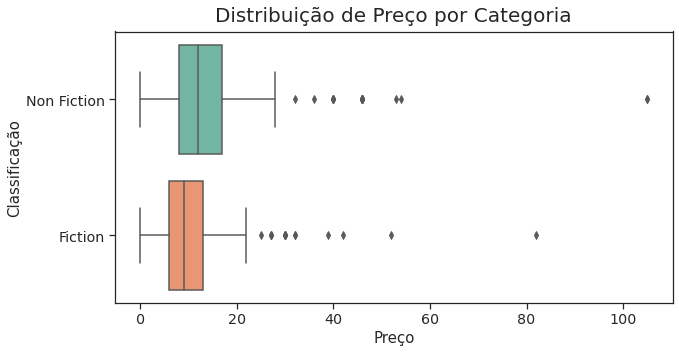

In [65]:
plt.figure(figsize=(10,5))

ax = sns.boxplot(data = dados, x = 'Price', y = 'Genre')
ax.set_title("Distribuição de Preço por Categoria", pad= 10, fontsize = 20)
ax.set_ylabel('Classificação', fontsize = 15)
ax.set_xlabel('Preço', fontsize = 15)

###Preço vs Ano

Text(0, 0.5, 'Preço')

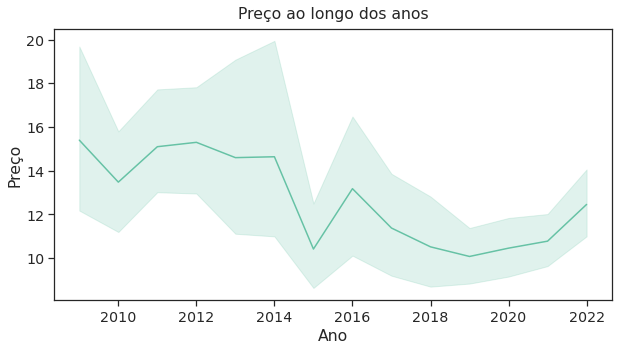

In [66]:
plt.figure(figsize=(10,5))

ax = sns.lineplot(data = dados, x = 'Year', y = 'Price')
ax.set_title('Preço ao longo dos anos', pad = 10)
ax.set_xlabel('Ano')
ax.set_ylabel('Preço')

# Houve queda acentuada da média dos preços em 2015

### Preço X Ano X Categoria

Text(0, 0.5, 'Preço')

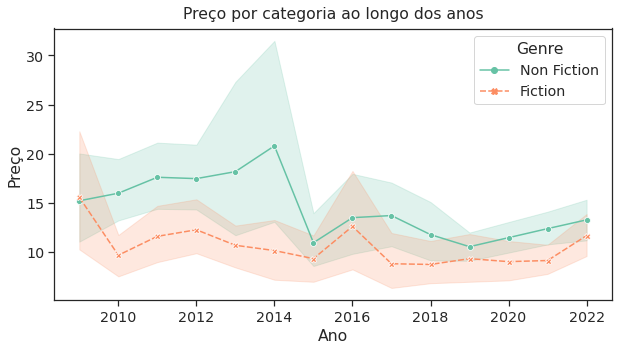

In [85]:
plt.figure(figsize=(10,5))

ax = sns.lineplot(data = dados, x = 'Year', y = 'Price', hue = 'Genre', style = 'Genre', markers = True)
ax.set_title('Preço por categoria ao longo dos anos', pad = 10)
ax.set_xlabel('Ano')
ax.set_ylabel('Preço')

# Houve descolamento de preços entre as duas categorias desde 2010. Em 2015, queda brusca dos preços 
# na categoria de não ficção, aproximando a média de preços novamente da categoria de ficção.

#Na média, a categoria de ficção tem preços mais baixos que a categoria de não ficção.

### Nota X Categoria

In [68]:
dados.groupby('Genre')['User_Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Fiction,312.0,4.664103,0.252052,3.3,4.6,4.8,4.8,4.9
Non Fiction,388.0,4.620361,0.185447,4.0,4.5,4.7,4.8,4.9


Text(0.5, 0, 'Notas')

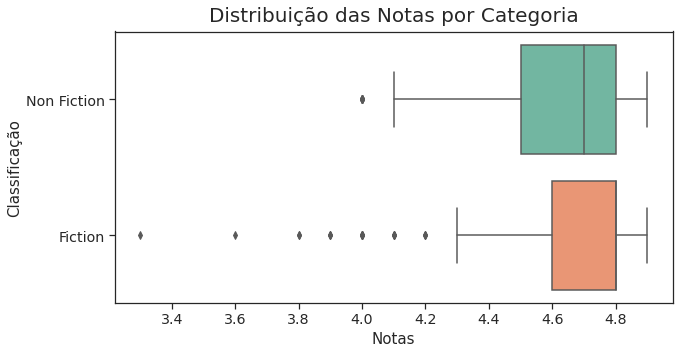

In [69]:
plt.figure(figsize=(10,5))

ax = sns.boxplot(data = dados, x = 'User_Rating', y = 'Genre')
ax.set_title("Distribuição das Notas por Categoria", pad= 10, fontsize = 20)
ax.set_ylabel('Classificação', fontsize = 15)
ax.set_xlabel('Notas', fontsize = 15)

# Os livros de ficção tem 

### Nota X Ano

Text(0, 0.5, 'Nota')

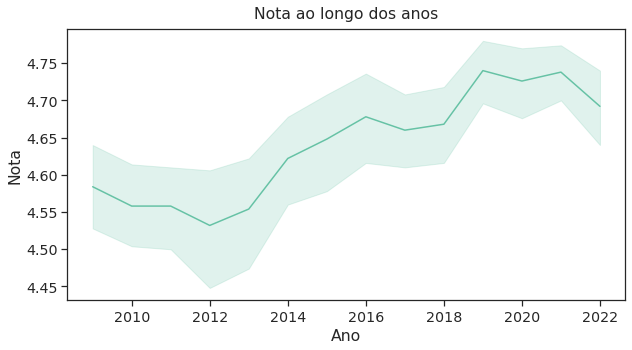

In [70]:
plt.figure(figsize=(10,5))

ax = sns.lineplot(data = dados, x = 'Year', y = 'User_Rating')
ax.set_title('Nota ao longo dos anos', pad = 10)
ax.set_xlabel('Ano')
ax.set_ylabel('Nota')

### Nota X Ano X Categoria

Text(0, 0.5, 'Nota')

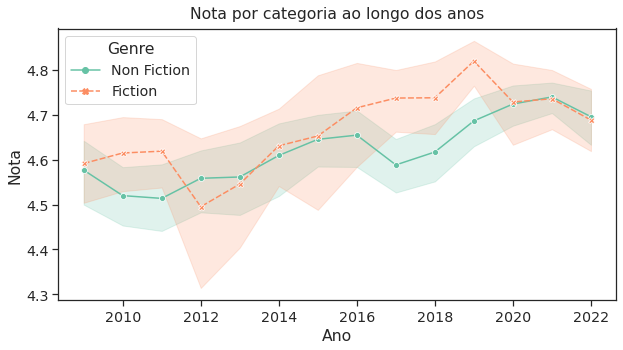

In [86]:
plt.figure(figsize=(10,5))

ax = sns.lineplot(data = dados, x = 'Year', y = 'User_Rating', hue = 'Genre', style = 'Genre', markers = True)
ax.set_title('Nota por categoria ao longo dos anos', pad = 10)
ax.set_xlabel('Ano')
ax.set_ylabel('Nota')

###Reviews X Categoria

In [72]:
dados.groupby('Genre')['Reviews'].describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Fiction,312.0,24034.105769,27548.930112,548.0,7122.0,14439.0,27582.5,208917.0
Non Fiction,388.0,15412.360825,19079.060296,37.0,3490.0,7910.5,19576.0,121109.0


Text(0.5, 0, 'Reviews')

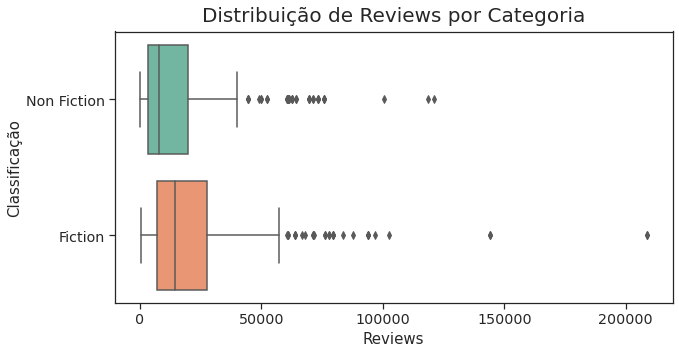

In [73]:
plt.figure(figsize=(10,5))

ax = sns.boxplot(data = dados, x = 'Reviews', y = 'Genre')
ax.set_title("Distribuição de Reviews por Categoria", pad= 10, fontsize = 20)
ax.set_ylabel('Classificação', fontsize = 15)
ax.set_xlabel('Reviews', fontsize = 15)

### Reviews X Ano

Text(0, 0.5, 'Reviews')

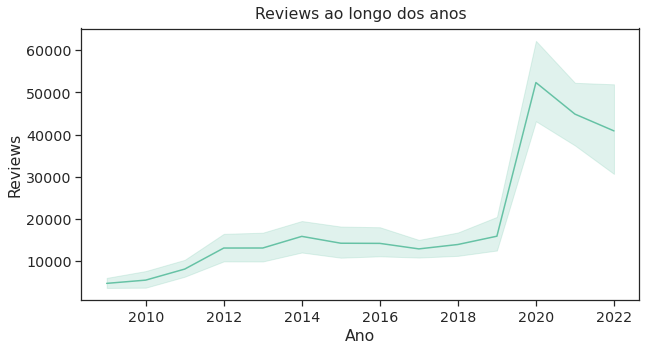

In [74]:
plt.figure(figsize=(10,5))

ax = sns.lineplot(data = dados, x = 'Year', y = 'Reviews')
ax.set_title('Reviews ao longo dos anos', pad = 10)
ax.set_xlabel('Ano')
ax.set_ylabel('Reviews')

### Reviews X Ano X Categoria

Text(0, 0.5, 'Reviews')

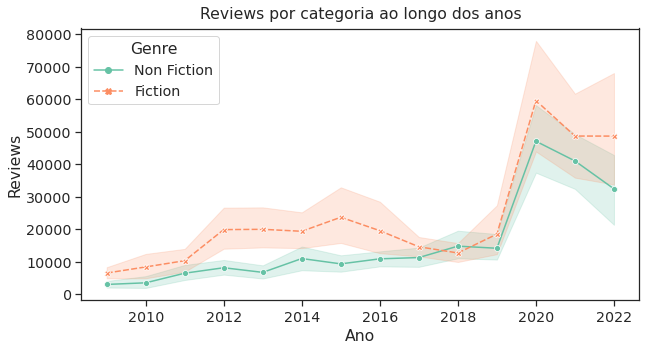

In [87]:
plt.figure(figsize=(10,5))

ax = sns.lineplot(data = dados, x = 'Year', y = 'Reviews', hue = 'Genre', style = 'Genre', markers = True)
ax.set_title('Reviews por categoria ao longo dos anos', pad = 10)
ax.set_xlabel('Ano')
ax.set_ylabel('Reviews')

### Conclusão

> Houve queda dos preços em 2015, puxado pela categoria de não ficção.

> Livros de ficção, em média, são mais baratos que os de não ficção.

> O número de reviews aumentou expressivamente em 2020 (possível efeito da quarentena).

> Livros de ficção, em média, ganham mais reviews que os de não ficção.